<a href="https://colab.research.google.com/github/Rochakr4/Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

# **Objectives**

The objective of the project would be to derive meanignful insights from the given data set. Following are the pointers we would be focusing on:

1. Data cleaning and finalising features 
2. Analysing global terror events
3. Analysing most affected regions
4. Analysing most affected countries 

THE INFORMATION REGARDING COLOUMN SUCH AS COLOUMN DEFINITION AND EXPLANATION HAS BEEN TAKEN FROM [Global Terrorism Database (GTD) CODEBOOK: METHODOLOGY, INCLUSION CRITERIA, AND VARIABLES](https://www.start.umd.edu/gtd/downloads/Codebook.pdf)



#1. Data cleaning and finalising features

The GTD contains 135 columns and 181691 rows of data related to terror events from 1970 to 2017. So in this step, we will,

1. Eliminate unwanted columns
2. Comprehend the NaN values
3. Rename the column names for better understanding

In [1]:
#The following libraries are used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  
from wordcloud import WordCloud 
import plotly.graph_objects as go
from matplotlib_venn import venn3, venn3_circles

In [3]:
pip install --upgrade plotly

     |████████████████████████████████| 27.7 MB 92.1 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [2]:
#Mounting to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
raw_global_terrorismdata=pd.read_csv('/content/drive/MyDrive/Global Terrorism Analysis/Global Terrorism Data.csv',encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
#creating a copy of dataframe
global_terrorismdata=raw_global_terrorismdata.copy()

In [5]:
#Analysing the type of coulmns
list(raw_global_terrorismdata)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [6]:
#Comprehending the NaN values and filling it will required values
global_terrorismdata['country_txt'].fillna('Unknown',inplace=True)
global_terrorismdata['region_txt'].fillna('Unknown',inplace=True)
global_terrorismdata['city'].fillna('Unknown',inplace=True)
global_terrorismdata['provstate'].fillna('Unknown',inplace=True)
global_terrorismdata['nwoundte'].fillna(0,inplace=True)
global_terrorismdata['ransomamt'].fillna(0,inplace=True)
global_terrorismdata['ransompaid'].fillna(0,inplace=True)
global_terrorismdata['success'].fillna('Unknown',inplace=True)
global_terrorismdata['attacktype1_txt'].fillna('Unknown',inplace=True)
global_terrorismdata['targtype1_txt'].fillna('Unknown',inplace=True)
global_terrorismdata['gname'].fillna('Unknown',inplace=True)
global_terrorismdata['weaptype1_txt'].fillna('Unknown',inplace=True)
global_terrorismdata['nkill'].fillna(0,inplace=True)
global_terrorismdata['nwound'].fillna(0,inplace=True)
global_terrorismdata['propvalue'].fillna(0,inplace=True)
global_terrorismdata['property'].fillna(0,inplace=True)
global_terrorismdata['nkillter'].fillna(0,inplace=True)
global_terrorismdata['alternative_txt'].fillna('unknown',inplace=True)
global_terrorismdata['doubtterr'].fillna(0,inplace=True)
global_terrorismdata['hostkidoutcome_txt'].fillna('Unknown',inplace=True)

In [7]:
#Eleminating columns with NaN values
na_coloumn=[]
for i in list(global_terrorismdata):
  if ((global_terrorismdata[i].isna().sum())*100/181691)>0:
    na_coloumn.append(i)
for i in na_coloumn:
   global_terrorismdata.drop(i, inplace=True, axis=1)
     

In [8]:
#Renaming the coloumn
global_terrorismdata.rename(columns={'iyear':'YEAR',
                           'imonth':'MONTH',
                           'iday':'DAY',
                           'country_txt':'COUNTRY',
                           'region_txt':'REGION',
                           'success':'SUCCESS',
                           'provstate':'STATE',
                           'attacktype1_txt':'ATTACK TYPE',
                           'targtype1_txt':'TARGET TYPE',
                           'gname':'ORGANISATION',
                           'weaptype1_txt':'WEAPON TYPE',
                           'nwound':'NO. OF WOUNDED',
                           'nkill':'NO. OF KILLED',
                           'nwoundte':'CULPRIT WOUNDED',
                           'ransomamt':'RANSOM AMOUNT',
                           'ransompaid':'RANSOM AMOUNT PAID',
                           'nkillter':'CULPRIT KILLED',
                           'doubtterr':'DOUBT TERROR',
                           'dbsource':'DATA BASE SOURCE'},inplace=True)

In [9]:
#Creating new coloumns for total number of casualities and no. of attacks
global_terrorismdata['CASUALITY']=global_terrorismdata['NO. OF KILLED']+global_terrorismdata['NO. OF WOUNDED']
global_terrorismdata['No.of attacks']=global_terrorismdata['eventid']/global_terrorismdata['eventid']

In [10]:
#Creating a region wise dataframe
region_wise=pd.merge(global_terrorismdata.groupby('REGION')['CASUALITY'].sum().reset_index(), global_terrorismdata.groupby('REGION')['No.of attacks'].count().reset_index(), how='inner').sort_values('No.of attacks',ascending=False)

In [11]:
#Finalised list of columns for further analysis
list(global_terrorismdata)

['eventid',
 'YEAR',
 'MONTH',
 'DAY',
 'extended',
 'country',
 'COUNTRY',
 'region',
 'REGION',
 'STATE',
 'city',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'DOUBT TERROR',
 'alternative_txt',
 'SUCCESS',
 'suicide',
 'attacktype1',
 'ATTACK TYPE',
 'targtype1',
 'TARGET TYPE',
 'ORGANISATION',
 'individual',
 'weaptype1',
 'WEAPON TYPE',
 'NO. OF KILLED',
 'CULPRIT KILLED',
 'NO. OF WOUNDED',
 'CULPRIT WOUNDED',
 'property',
 'propvalue',
 'RANSOM AMOUNT',
 'RANSOM AMOUNT PAID',
 'hostkidoutcome_txt',
 'DATA BASE SOURCE',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY',
 'CASUALITY',
 'No.of attacks']

# **2. ANALYSING GLOBAL TERROR EVENTS**

Here we will analyse terror situations at global scale

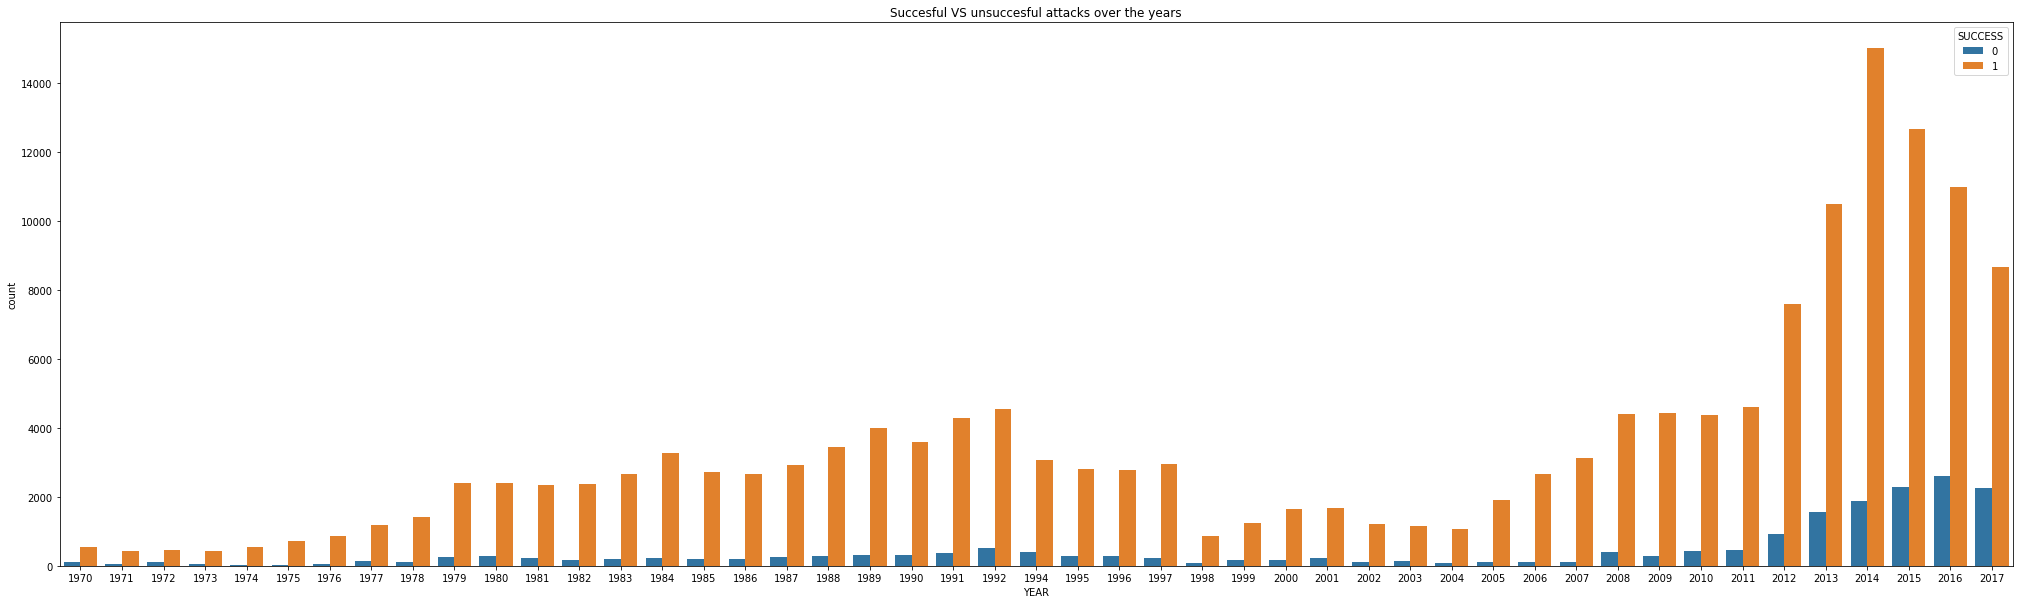

In [12]:
#Visualisation of number of attacks per year country wise
total_attacks=px.choropleth( global_terrorismdata.groupby(['YEAR','COUNTRY'])['eventid'].count().reset_index(),locations='COUNTRY',locationmode='country names',color='eventid', hover_name='COUNTRY',
                            title='NUMBER OF ATTACKS PER YEAR(1970-2017)',
                            color_continuous_scale = px.colors.sequential.OrRd,
                            animation_frame='YEAR',labels={'eventid':'NO. OF ATTACKS'})
total_attacks.show()
#Visualisation of total number of casualities country wise
total_casuality=px.choropleth( global_terrorismdata.groupby('COUNTRY')['CASUALITY'].sum().reset_index(),locations='COUNTRY',locationmode='country names',color='CASUALITY',
                            hover_name='COUNTRY',
                            title='TOTAL NUMBER OF CASUALITIES(1970-2017)',
                            color_continuous_scale = px.colors.sequential.OrRd,
                            labels={'CASUALITY':'NO. OF CASUALITIES'})
total_casuality.show()        
#Count plot on Succesful VS unsuccesful attacks over the years
plt.rcParams['figure.figsize']=[35,10]
sns.countplot(x='YEAR',hue='SUCCESS',data=global_terrorismdata)
plt.title('Succesful VS unsuccesful attacks over the years')
plt.show()
#Line plot on region wise number of attacks and
Region_wise=px.line(data_frame=pd.merge(global_terrorismdata.groupby('REGION')['CASUALITY'].sum().reset_index(), global_terrorismdata.groupby('REGION')['No.of attacks'].count().reset_index(), how='inner').sort_values('No.of attacks',ascending=False)
                    ,y=['No.of attacks','CASUALITY'],x='REGION',title='REGION WISE NUNMBER OF ATTACKS AND CASUALITIES')
Region_wise.show()
#Treemap visualisation affected countries in terms of number of attack
treemap_country_wise=px.treemap(data_frame=global_terrorismdata,
                     values='No.of attacks',
                     path=['COUNTRY','STATE'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on country and state in terms of number of attacks',)
treemap_country_wise.show()

In [13]:
#Dataframe of top 2 regions affected by terrorism which in a way constituted 50% of total events
country_wise_attacks=global_terrorismdata.groupby('REGION')['No.of attacks'].count().sort_values(ascending=False).reset_index()
country_wise_attacks['percentage']=country_wise_attacks['No.of attacks']*100/181691
tot_row_re = pd.DataFrame(country_wise_attacks.head(2).sum()).T
tot_row_re['REGION'] = 'TOTAL'
print('Dataframe of top 2 regions affected by terrorism which in a way constituted 50% of total events')
display(pd.concat([country_wise_attacks.head(2), tot_row_re]))
#Dataframe of top 8 countries affected by terrorism which in a way constituted 50% of total events
country_wise_attacks=global_terrorismdata.groupby('COUNTRY')['No.of attacks'].count().sort_values(ascending=False).reset_index()
country_wise_attacks['percentage']=country_wise_attacks['No.of attacks']*100/181691
country_wise_attacks.head(8)
tot_row = pd.DataFrame(country_wise_attacks.head(8).sum()).T
tot_row['COUNTRY'] = 'TOTAL'
print('Dataframe of top 8 countries affected by terrorism which in a way constituted 50% of total events')
pd.concat([country_wise_attacks.head(8), tot_row])

Dataframe of top 2 regions affected by terrorism which in a way constituted 50% of total events


REGION No.of attacks percentage
0  Middle East & North Africa         50474  27.780132
1                  South Asia         44974  24.753015
0                       TOTAL         95448  52.533147

Dataframe of top 8 countries affected by terrorism which in a way constituted 50% of total events


COUNTRY No.of attacks percentage
0         Iraq         24636  13.559285
1     Pakistan         14368   7.907932
2  Afghanistan         12731   7.006951
3        India         11960   6.582605
4     Colombia          8306   4.571498
5  Philippines          6908    3.80206
6         Peru          6096   3.355147
7  El Salvador          5320   2.928048
0        TOTAL         90325  49.713525

# ***2.1 Analysis based on Inclusion Criteria (crit1, crit2, crit3)***

  These variables record which of the inclusion criteria (in addition to the necessary criteria) are met. This allows users to filter out those incidents whose inclusion was based on a criterion which they believe does not constitute terrorism proper. Note that for each of the criteria variables a case is coded as “1” if source information indicates that the criterion is met and “0” if source information indicates that the criterion is not met or that there is no indication that it is met.

***Criterion 1: POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL (CRIT1)***

The violent act must be aimed at attaining a political, economic, religious, or social goal.
This criterion is not satisfied in those cases where the perpetrator(s) acted out of a pure
profit motive or from an idiosyncratic personal motive unconnected with broader
societal change.

1 = "Yes" The incident meets Criterion 1.

0 = "No" The incident does not meet Criterion 1 or there is no indication that the
incident meets Criterion 1.

***Criterion 2: INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE(S)
(CRIT2)***

To satisfy this criterion there must be evidence of an intention to coerce, intimidate, or
convey some other message to a larger audience (or audiences) than the immediate
victims. Such evidence can include (but is not limited to) the following: pre- or postattack statements by the perpetrator(s), past behavior by the perpetrators, or the
particular nature of the target/victim, weapon, or attack type.

1 = "Yes" The incident meets Criterion 2.

0 = "No" The incident does not meet Criterion 2 or no indication.

***Criterion 3: OUTSIDE INTERNATIONAL HUMANITARIAN LAW (CRIT3)***

The action is outside the context of legitimate warfare activities, insofar as it targets
non-combatants (i.e. the act must be outside the parameters permitted by international
humanitarian law as reflected in the Additional Protocol to the Geneva Conventions of
12 August 1949 and elsewhere).

1 = "Yes" The incident meets Criterion 3.

0 = "No" The incident does not meet Criterion 3.


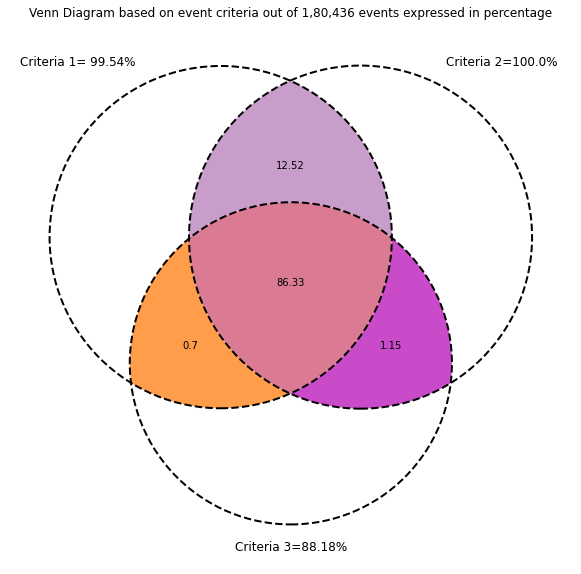

In [14]:
crit1=round(global_terrorismdata[(global_terrorismdata.crit1==1)]['eventid'].count()*100/180436,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit2=round(global_terrorismdata[(global_terrorismdata.crit2==1)]['eventid'].count()*100/180436,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit3=round(global_terrorismdata[(global_terrorismdata.crit3==1)]['eventid'].count()*100/180436,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_1_2_3=round(global_terrorismdata[(global_terrorismdata.crit1==1) & (global_terrorismdata.crit2==1) & (global_terrorismdata.crit3==1)]['eventid'].count()*100/180436,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_1_2=round(global_terrorismdata[(global_terrorismdata.crit1==1) & (global_terrorismdata.crit2==1) & (global_terrorismdata.crit3==0)]['eventid'].count()*100/180436,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_1_3=round(global_terrorismdata[(global_terrorismdata.crit1==1) & (global_terrorismdata.crit3==1) & (global_terrorismdata.crit2==0)]['eventid'].count()*100/180436,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_2_3=round(global_terrorismdata[(global_terrorismdata.crit2==1) & (global_terrorismdata.crit3==1) & (global_terrorismdata.crit1==0)]['eventid'].count()*100/180436,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1

v=venn3(subsets=(crit1, crit2, crit_1_2, crit3,crit_1_3, crit_2_3,crit_1_2_3), 
      set_labels=('Criteria 1= 99.54%', 'Criteria 2=100.0%', 'Criteria 3=88.18%'), 
      set_colors=("orange", "blue", "red"), alpha=0.7)
v.get_patch_by_id('100').set_color("white")
v.get_label_by_id("100").set_text("")
v.get_patch_by_id('001').set_color("white")
v.get_label_by_id("001").set_text("")
v.get_patch_by_id('010').set_color("white")
v.get_label_by_id("010").set_text("")
venn3_circles(subsets=(crit1, crit2, crit_1_2, crit3,crit_1_3, crit_2_3,crit_1_2_3), 
              linestyle="dashed", linewidth=2)
plt.title("Venn Diagram based on event criteria out of 1,80,436 events expressed in percentage")

plt.show()

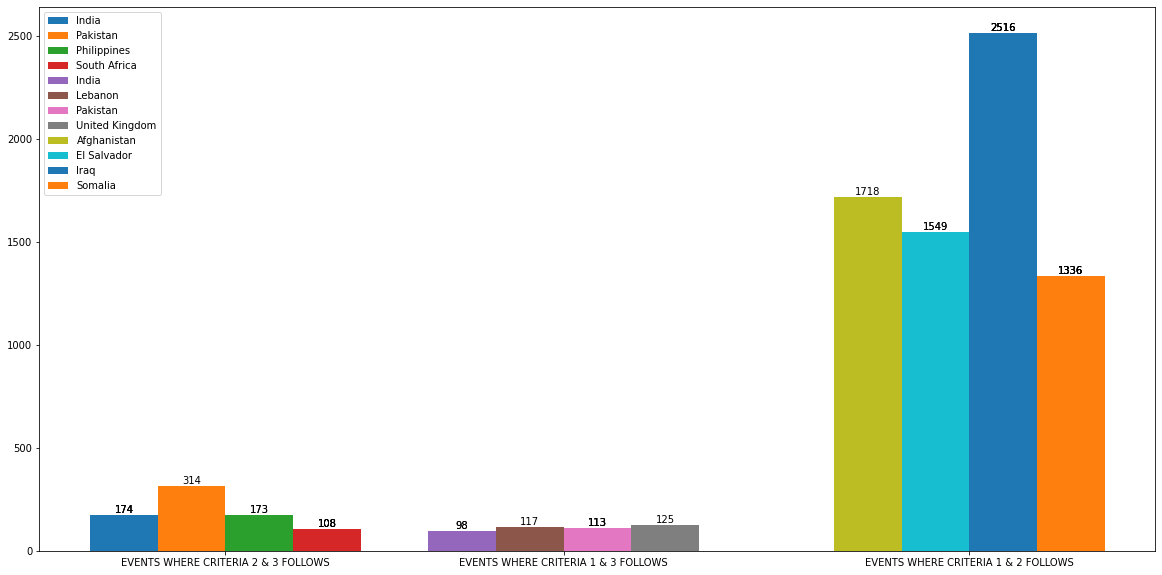

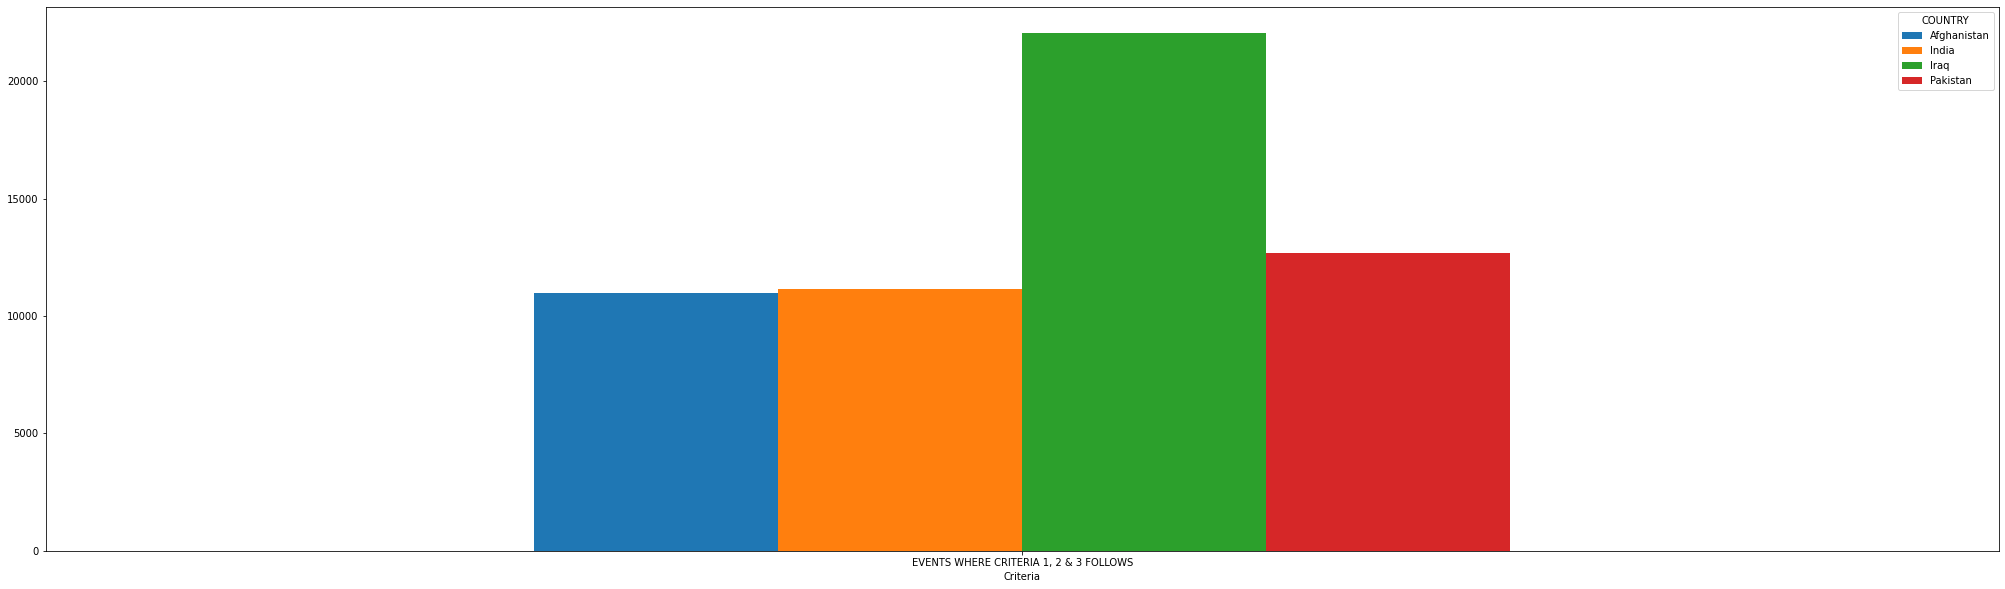

In [ ]:
crit2_3_top4=global_terrorismdata[(global_terrorismdata.crit1==0) & (global_terrorismdata.crit2==1) & (global_terrorismdata.crit3==1)].groupby('COUNTRY')['No.of attacks'].count().sort_values(ascending=False).reset_index().head(4)
crit1_3_top4=global_terrorismdata[(global_terrorismdata.crit1==1) & (global_terrorismdata.crit2==0) & (global_terrorismdata.crit3==1)].groupby('COUNTRY')['No.of attacks'].count().sort_values(ascending=False).reset_index().head(4)
crit1_2_top4=global_terrorismdata[(global_terrorismdata.crit1==1) & (global_terrorismdata.crit2==1) & (global_terrorismdata.crit3==0)].groupby('COUNTRY')['No.of attacks'].count().sort_values(ascending=False).reset_index().head(4)
crit1_2_3_top4=global_terrorismdata[(global_terrorismdata.crit1==1) & (global_terrorismdata.crit2==1) & (global_terrorismdata.crit3==1)].groupby('COUNTRY')['No.of attacks'].count().sort_values(ascending=False).reset_index().head(4)
crit2_3_top4['Criteria']=0
crit1_3_top4['Criteria']=1
crit1_2_top4['Criteria']=2
crit1_2_3_top4['Criteria']='EVENTS WHERE CRITERIA 1, 2 & 3 FOLLOWS'
ty=pd.concat([crit2_3_top4, crit1_3_top4, crit1_2_top4])
ty=ty.pivot_table(index='Criteria',columns='COUNTRY')
ty.columns = ty.columns.droplevel()
ty=ty.reset_index()
fig = plt.figure(figsize=(20, 10))

# width of bars
width = 1
# create emptly lists for x tick positions and names
x_ticks_pos = []
# counter for helping with x tick positions
count = 0
# go through each row of the dataframe
for idx, row in ty.iterrows():
    # this will be the first bar position for this row
    count += idx
    # this will be the start of the first bar for this row
    start_idx = count - width / 2
    # this will be the end of the last bar for this row
    end_idx = start_idx
    # for each column in the wanted columns,
    # if the row is not null,
    # add the bar to the plot
    # also update the end position of the bars for this row
    for column in ty.drop(["Criteria"], axis=1).columns:
      
      for rect in klm:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
      if row[column] == row[column]:
            klm=plt.bar(count, row[column], width=width, label=column)
            count += 1
            end_idx += width   
        
    # this checks if the row had any not NULL value in the desired columns
    # in other words, it checks if there was any bar for this row
    # if yes, add the center of all the row's bars and the row's name (A,B,C) to the respective lists
    if end_idx != start_idx:
        x_ticks_pos.append((end_idx + start_idx) / 2)


# now set the x_ticks
x_ticks = ['EVENTS WHERE CRITERIA 2 & 3 FOLLOWS', 'EVENTS WHERE CRITERIA 1 & 3 FOLLOWS', 'EVENTS WHERE CRITERIA 1 & 2 FOLLOWS']
plt.xticks(x_ticks_pos, x_ticks)
# plot the legends
plt.legend()
plt.show()
yu=crit1_2_3_top4.pivot_table(index='Criteria',columns='COUNTRY')
yu.columns = yu.columns.droplevel()
yu.plot.bar(rot=0)


# **2.3 Analysis based on target types**

In [15]:
#pie chart on target type
target_type_piechart=px.pie(global_terrorismdata.groupby('TARGET TYPE')['No.of attacks'].count().reset_index(), 
          values='No.of attacks',
          names='TARGET TYPE',
          title='Total number of attacks interms of target type')
target_type_piechart.show()

In [16]:
#Treemap visualisation of target types and country with respect to number of attacks
treemap_target_type=px.treemap(data_frame=global_terrorismdata,
                     values='No.of attacks',
                     path=['TARGET TYPE','COUNTRY'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on target types and country in terms of number of attacks',)
treemap_target_type.show()
#Treemap visualisation of organisation interms of target types with respect to number of casualities
treemap_target_type1=px.treemap(data_frame=global_terrorismdata,
                     values='CASUALITY',
                     path=['TARGET TYPE','COUNTRY'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on target types and country in terms of number of attacks',)
treemap_target_type1.show()

# 2.4 Analysis based on Attack types

In [17]:
#pie chart on attack type
attack_type_piechart=px.pie(global_terrorismdata.groupby('ATTACK TYPE')['No.of attacks'].count().reset_index(), 
          values='No.of attacks',
          names='ATTACK TYPE',
          title='Total number of attacks interms of attack type')
attack_type_piechart.show()

In [18]:
ATTACK_TYPE_data=global_terrorismdata.groupby('ATTACK TYPE')['No.of attacks'].count().reset_index()
ATTACK_TYPE_data_success=global_terrorismdata.groupby('ATTACK TYPE')['SUCCESS'].sum().reset_index()
ATTACK_TYPE_data_casuality=global_terrorismdata.groupby('ATTACK TYPE')['CASUALITY'].sum().reset_index()
ATTACK_TYPE_data['SUCCESS']=ATTACK_TYPE_data_success.SUCCESS
ATTACK_TYPE_data['CASUALITY']=ATTACK_TYPE_data_casuality.CASUALITY
ATTACK_TYPE_data['PERCENTAGE']=ATTACK_TYPE_data['SUCCESS']*100/ATTACK_TYPE_data['No.of attacks']
ATTACK_TYPE_data.sort_values(by='No.of attacks',ascending=False)

display(ATTACK_TYPE_data.sort_values(by='PERCENTAGE',ascending=False))

px.bar(data_frame=ATTACK_TYPE_data.sort_values(by='PERCENTAGE',ascending=False),
                  
                  x='PERCENTAGE',y='ATTACK TYPE',
                  hover_data=['CASUALITY'],color='CASUALITY',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='ATTACK TYPE AND THERE SUCCESS PERCENTAGE')

ATTACK TYPE  No.of attacks  SUCCESS  CASUALITY  \
5  Hostage Taking (Barricade Incident)            991      983     8444.0   
6          Hostage Taking (Kidnapping)          11158    10907    30677.0   
0                        Armed Assault          42669    40345   237663.0   
3       Facility/Infrastructure Attack          10356     9779     7407.0   
4                            Hijacking            659      579    20719.0   
2                    Bombing/Explosion          88255    77530   530007.0   
7                      Unarmed Assault           1015      879    14907.0   
8                              Unknown           7276     6015    47106.0   
1                        Assassination          19312    14615    38807.0   

   PERCENTAGE  
5   99.192735  
6   97.750493  
0   94.553423  
3   94.428351  
4   87.860395  
2   87.847714  
7   86.600985  
8   82.669049  
1   75.678335

In [19]:
#Treemap visualisation of attack types and country with respect to number of attacks
treemap_attack_type=px.treemap(data_frame=global_terrorismdata,
                     values='No.of attacks',
                     path=['ATTACK TYPE','COUNTRY'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on attack types and country in terms of number of attacks',)
treemap_attack_type.show()
#Treemap visualisation of organisation interms of attack types with respect to number of casualities
treemap_attack_type1=px.treemap(data_frame=global_terrorismdata,
                     values='CASUALITY',
                     path=['ATTACK TYPE','COUNTRY'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on attack types and country in terms of number of casualties',)
treemap_attack_type1.show()


# 2.5 Analysis based on weapon types

In [20]:
#pie chart on weapon type
attack_type_piechart=px.pie(global_terrorismdata.groupby('WEAPON TYPE')['No.of attacks'].count().reset_index(), 
          values='No.of attacks',
          names='WEAPON TYPE',
          title='Total number of attacks interms of weapon type')
attack_type_piechart.show()

In [21]:
WEAPON_TYPE_data=global_terrorismdata.groupby('WEAPON TYPE')['No.of attacks'].count().reset_index()
WEAPON_TYPE_data_success=global_terrorismdata.groupby('WEAPON TYPE')['SUCCESS'].sum().reset_index()
WEAPON_TYPE_data_casuality=global_terrorismdata.groupby('WEAPON TYPE')['CASUALITY'].sum().reset_index()
WEAPON_TYPE_data['SUCCESS']=WEAPON_TYPE_data_success.SUCCESS
WEAPON_TYPE_data['CASUALITY']=WEAPON_TYPE_data_casuality.CASUALITY
WEAPON_TYPE_data['PERCENTAGE']=WEAPON_TYPE_data['SUCCESS']*100/WEAPON_TYPE_data['No.of attacks']
WEAPON_TYPE_data.sort_values(by='No.of attacks',ascending=False)

display(WEAPON_TYPE_data.sort_values(by='PERCENTAGE',ascending=False))

px.bar(data_frame=WEAPON_TYPE_data.sort_values(by='PERCENTAGE',ascending=False),
                  
                  x='PERCENTAGE',y='WEAPON TYPE',
                  hover_data=['CASUALITY'],color='CASUALITY',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='WEAPON TYPE AND THERE SUCCESS PERCENTAGE')

WEAPON TYPE  No.of attacks  SUCCESS  \
9                                  Sabotage Equipment            141      133   
5                                          Incendiary          11135    10472   
4                                            Firearms          58524    54090   
6                                               Melee           3655     3286   
10                                            Unknown          15157    13420   
2                                          Explosives          92426    79746   
11  Vehicle (not to include vehicle-borne explosiv...            136      117   
7                                               Other            114       90   
1                                            Chemical            321      243   
3                                        Fake Weapons             33       18   
0                                          Biological             35       15   
8                                        Radiological             14        2   

    CASUALITY  PERCENTAGE  
9       369.0   94.326241  
5     11006.0   94.045802  
4    252113.0   92.423621  
6     16070.0   89.904241  
10    60195.0   88.539949  
2    560181.0   86.280917  
11    20305.0   86.029412  
7       228.0   78.947368  
1     14449.0   75.700935  
3         1.0   54.545455  
0       814.0   42.857143  
8         6.0   14.285714

In [22]:
#Treemap visualisation of weapon types and country with respect to number of attacks
treemap_weapon_type=px.treemap(data_frame=global_terrorismdata,
                     values='No.of attacks',
                     path=['WEAPON TYPE','COUNTRY'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on weapon types and country in terms of number of attacks',)
treemap_weapon_type.show()
#Treemap visualisation of organisation interms of weapon types with respect to number of casualities
treemap_weapon_type1=px.treemap(data_frame=global_terrorismdata,
                     values='CASUALITY',
                     path=['WEAPON TYPE','COUNTRY'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on weapon types and country in terms of number of casualties',)
treemap_weapon_type1.show()


# **2. ANALYSING GLOBAL TERROR EVENTS INTERMS OF ORGANISATION**

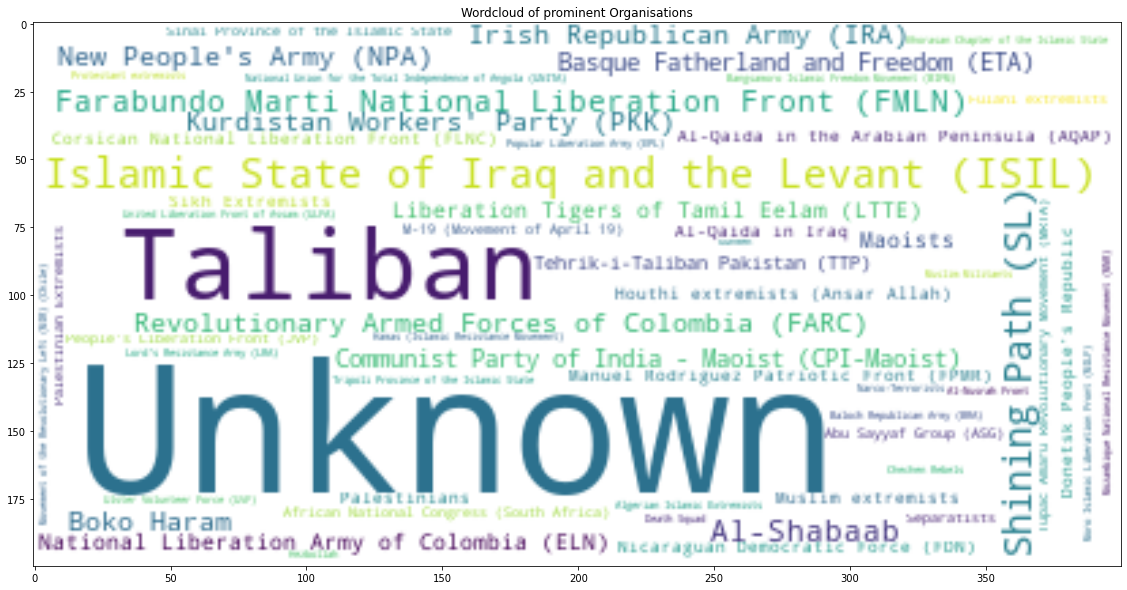

In [34]:
organisation_data=global_terrorismdata.groupby('ORGANISATION')['No.of attacks'].count().reset_index()
global_organisation_dict={}
for group,attacks in zip(organisation_data.ORGANISATION,organisation_data['No.of attacks']):
  global_organisation_dict[group]=attacks
wordcloud = WordCloud(background_color='white',collocations=False)
wordcloud.generate_from_frequencies(frequencies=global_organisation_dict) #using the dictionary created earlier
plt.figure(figsize=(30,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Wordcloud of prominent Organisations')
plt.axis("on")
plt.show()

In [23]:
treemap=px.treemap(data_frame=global_terrorismdata,
           values='CASUALITY',
           path=['ORGANISATION','COUNTRY'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation, country and state in terms of number of attacks',)
treemap.show()
treemap=px.treemap(data_frame=global_terrorismdata,
           values='No.of attacks',
           path=['COUNTRY','ORGANISATION'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation, country and state in terms of number of attacks',)
treemap.show()

In [120]:
er=global_terrorismdata.groupby(['ORGANISATION','COUNTRY'])['No.of attacks'].count().reset_index()
ef=er.groupby(['ORGANISATION'])['COUNTRY'].count().reset_index()
ef['No.of attacks']=global_terrorismdata.groupby(['ORGANISATION'])['No.of attacks'].count().reset_index()['No.of attacks']
ef.sort_values(by='COUNTRY',ascending=False).head(20)
px.bar(data_frame=ef.sort_values(by='COUNTRY',ascending=False).head(20),
                  
                  x='COUNTRY',y='ORGANISATION',
                  hover_data=['No.of attacks'],color='No.of attacks',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='TOP 20 ORGANISATION IN TERMS OF NUMBER OF COUNTRIES ACTIVE WITH RESPECT TO NUMBER OF ATTACKS ')

In [176]:
treemap=px.treemap(data_frame=global_terrorismdata,
           values='No.of attacks',
           path=['WEAPON TYPE','ORGANISATION','COUNTRY'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation, country and state in terms of number of attacks')
treemap.show()
treemap=px.treemap(data_frame=global_terrorismdata,
           values='No.of attacks',
           path=['ATTACK TYPE','ORGANISATION','COUNTRY'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation, country and state in terms of number of attacks')
treemap.show()

In [25]:
organisation_data=global_terrorismdata.groupby('ORGANISATION')['No.of attacks'].count().reset_index()
organisation_data_success=global_terrorismdata.groupby('ORGANISATION')['SUCCESS'].sum().reset_index()
organisation_data_casuality=global_terrorismdata.groupby('ORGANISATION')['CASUALITY'].sum().reset_index()
organisation_data['SUCCESS']=organisation_data_success.SUCCESS
organisation_data['CASUALITY']=organisation_data_casuality.CASUALITY
organisation_data['PERCENTAGE']=organisation_data['SUCCESS']*100/organisation_data['No.of attacks']
organisation_data.sort_values(by='No.of attacks',ascending=False)

display(organisation_data.sort_values(by='No.of attacks',ascending=False).head(10))

px.bar(data_frame=organisation_data.sort_values(by='No.of attacks',ascending=False).head(10).sort_values(by='PERCENTAGE',ascending=False),
                  
                  x='PERCENTAGE',y='ORGANISATION',
                  hover_data=['CASUALITY'],color='CASUALITY',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='ORGANISATION AND THERE SUCCESS PERCENTAGE')

ORGANISATION  No.of attacks  \
3408                                           Unknown          82782   
3138                                           Taliban           7478   
1535       Islamic State of Iraq and the Levant (ISIL)           5613   
2948                                 Shining Path (SL)           4555   
1120  Farabundo Marti National Liberation Front (FMLN)           3351   
177                                         Al-Shabaab           3288   
2266                           New People's Army (NPA)           2772   
1484                       Irish Republican Army (IRA)           2671   
2717     Revolutionary Armed Forces of Colombia (FARC)           2487   
704                                         Boko Haram           2418   

      SUCCESS  CASUALITY  PERCENTAGE  
3408    71748   322706.0   86.671015  
3138     6680    57342.0   89.328698  
1535     4759    69595.0   84.785320  
2948     4337    14632.0   95.214050  
1120     3317    12130.0   98.985377  
177      3016    16954.0   91.727494  
2266     2457     7719.0   88.636364  
1484     2282     5462.0   85.436166  
2717     2302    10015.0   92.561319  
704      2247    29801.0   92.928040

Analysising organisation with respect to criteria

In [26]:
treemap=px.treemap(data_frame=global_terrorismdata[(global_terrorismdata.crit1==1) & (global_terrorismdata.crit2==1) & (global_terrorismdata.crit3==0)],
           values='No.of attacks',
           path=['ORGANISATION','COUNTRY'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation & country the events where only criteria 1 and 2 follows',)
treemap.show()
treemap=px.treemap(data_frame=global_terrorismdata[(global_terrorismdata.crit1==1) & (global_terrorismdata.crit2==0) & (global_terrorismdata.crit3==1)],
           values='No.of attacks',
           path=['ORGANISATION','COUNTRY'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation & country the events where only criteria 1 and 3 follows',)
treemap.show()
treemap=px.treemap(data_frame=global_terrorismdata[(global_terrorismdata.crit1==0) & (global_terrorismdata.crit2==1) & (global_terrorismdata.crit3==1)],
           values='No.of attacks',
           path=['ORGANISATION','COUNTRY'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation & country the events where only criteria 2 and 3 follows',)
treemap.show()
treemap=px.treemap(data_frame=global_terrorismdata[(global_terrorismdata.crit1==1) & (global_terrorismdata.crit2==1) & (global_terrorismdata.crit3==1)],
           values='No.of attacks',
           path=['ORGANISATION','COUNTRY'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation & country the events where only criteria 1,2 and 3 follows',)
treemap.show()

#Analysising most affected regions i.e, Middle East & North Africa and South Asia

In [146]:
global_terrorismdata_me=global_terrorismdata[global_terrorismdata.REGION=='Middle East & North Africa']
global_terrorismdata_sa=global_terrorismdata[global_terrorismdata.REGION=='South Asia']

In [49]:
#Pie diagram on number of attacks in top affected regions
Me=pd.DataFrame(global_terrorismdata_me.groupby('COUNTRY')['No.of attacks'].count().reset_index())#For Middle East & North Africa
MeNa=px.pie(Me, values='No.of attacks',names='COUNTRY',title='TOTAL NUMBER OF ATTACKS IN THE MIDDLE EAST & NORTH AFRICA REGION COUNTRY WISE')
MeNa.show()
Sa=pd.DataFrame(global_terrorismdata_sa.groupby('COUNTRY')['No.of attacks'].count().reset_index())#For South asia
Sar=px.pie(Sa, values='No.of attacks',names='COUNTRY',title='TOTAL NUMBER OF ATTACKS IN THE SOUTH ASIAN REGION COUNTRY WISE')
Sar.show()

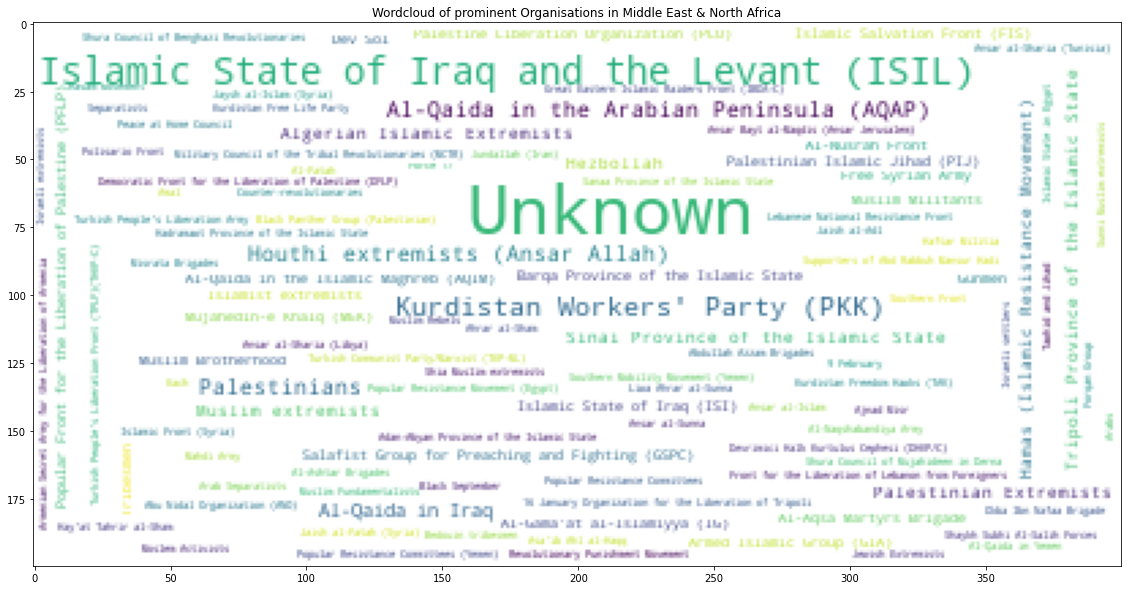

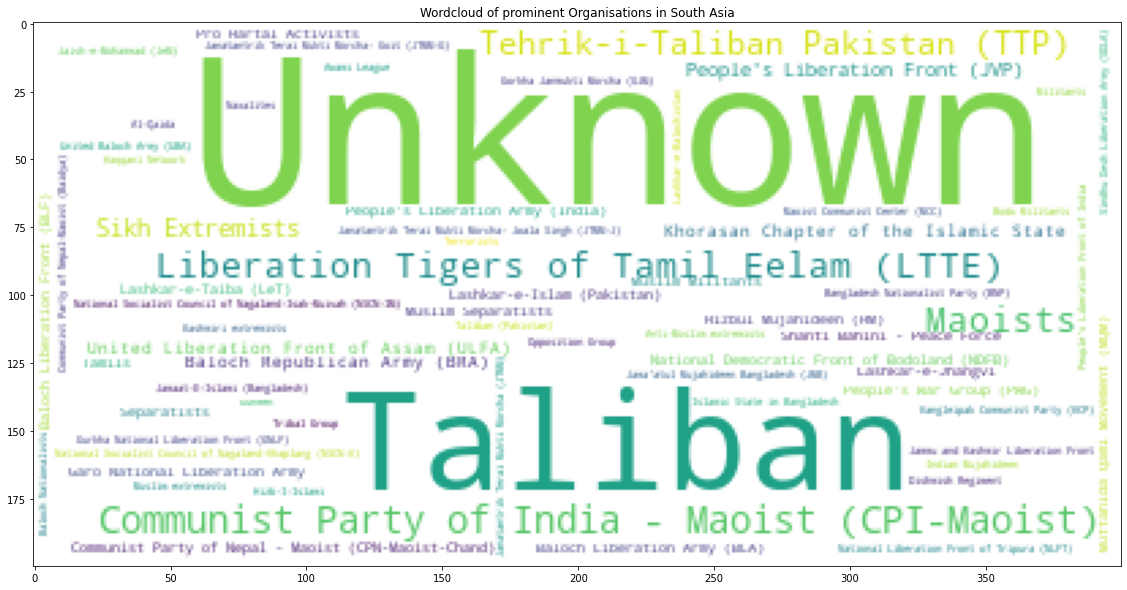

In [90]:
organisation_data=global_terrorismdata_me.groupby('ORGANISATION')['No.of attacks'].count().reset_index()
global_organisation_dict_me={}
for group,attacks in zip(organisation_data.ORGANISATION,organisation_data['No.of attacks']):
  global_organisation_dict_me[group]=attacks

wordcloud = WordCloud(background_color='white',collocations=False)
wordcloud.generate_from_frequencies(frequencies=global_organisation_dict_me) #using the dictionary created earlier
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Wordcloud of prominent Organisations in Middle East & North Africa')
plt.axis("on")
plt.show()

organisation_data=global_terrorismdata_sa.groupby('ORGANISATION')['No.of attacks'].count().reset_index()
global_organisation_dict_sa={}
for group,attacks in zip(organisation_data.ORGANISATION,organisation_data['No.of attacks']):
  global_organisation_dict_sa[group]=attacks

wordcloud = WordCloud(background_color='white',collocations=False)
wordcloud.generate_from_frequencies(frequencies=global_organisation_dict_sa) #using the dictionary created earlier
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Wordcloud of prominent Organisations in South Asia')
plt.axis("on")
plt.show()

In [60]:
treemap=px.treemap(data_frame=global_terrorismdata_me,
           values='No.of attacks',
           path=['ORGANISATION','COUNTRY'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation, country and state in terms of number of attacks',)
treemap.show()
treemap=px.treemap(data_frame=global_terrorismdata_sa,
           values='No.of attacks',
           path=['ORGANISATION','COUNTRY',],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation, country and state in terms of number of attacks',)
treemap.show()

In [57]:
#pie chart on attack type
attack_type_piechart=px.pie(global_terrorismdata_me.groupby('ATTACK TYPE')['No.of attacks'].count().reset_index(), 
          values='No.of attacks',
          names='ATTACK TYPE',
          title='Total number of attacks interms of attack type in Middle East & North Africa')
attack_type_piechart.show()

attack_type_piechart=px.pie(global_terrorismdata_sa.groupby('ATTACK TYPE')['No.of attacks'].count().reset_index(), 
          values='No.of attacks',
          names='ATTACK TYPE',
          title='Total number of attacks interms of attack type in South Asia')
attack_type_piechart.show()

#pie chart on weapon type
attack_type_piechart=px.pie(global_terrorismdata_me.groupby('WEAPON TYPE')['No.of attacks'].count().reset_index(), 
          values='No.of attacks',
          names='WEAPON TYPE',
          title='Total number of attacks interms of weapon type in Middle East & North Africa')
attack_type_piechart.show()
attack_type_piechart=px.pie(global_terrorismdata_sa.groupby('WEAPON TYPE')['No.of attacks'].count().reset_index(), 
          values='No.of attacks',
          names='WEAPON TYPE',
          title='Total number of attacks interms of weapon type in South Asia')
attack_type_piechart.show()

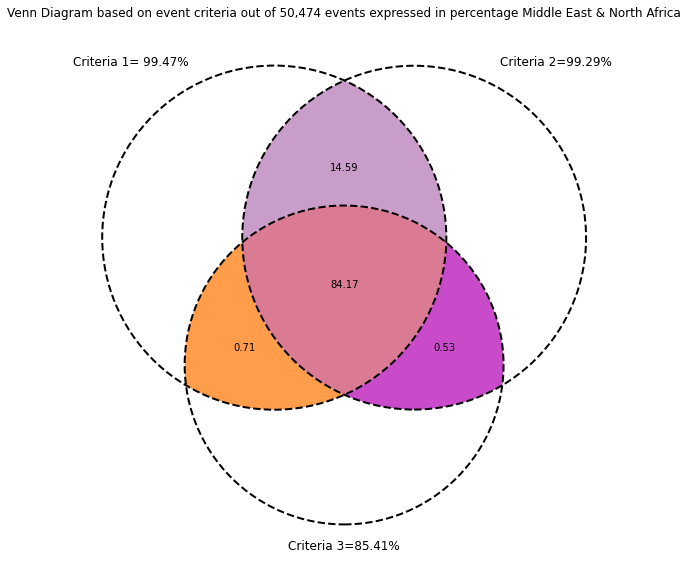

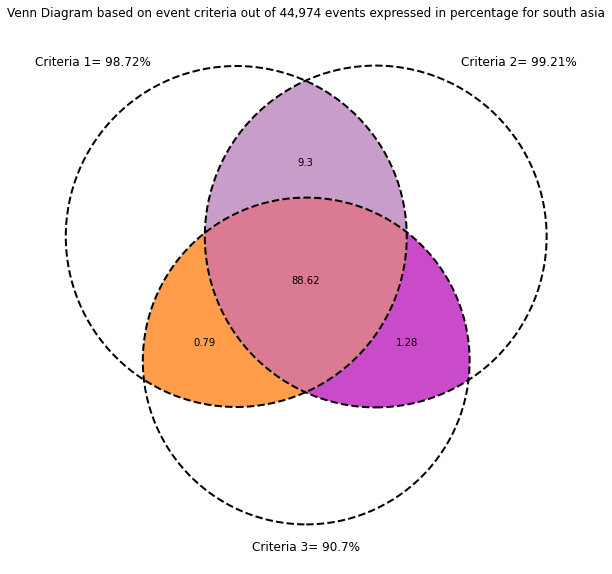

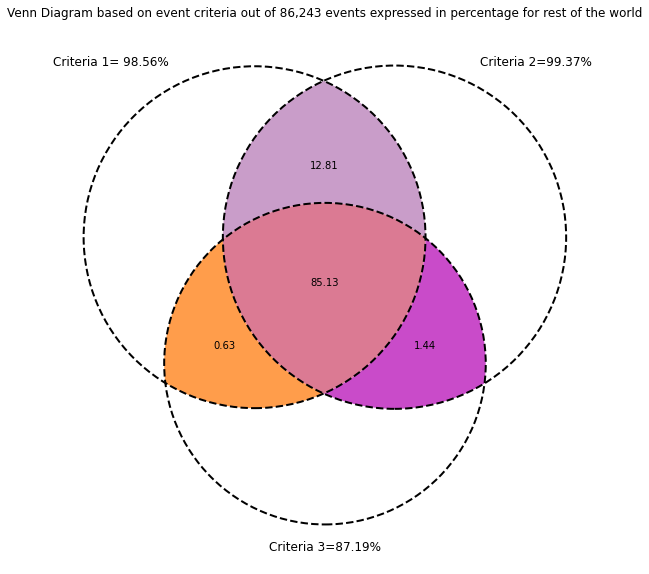

In [152]:
#Venn Diagram based on event criteria out of 50,474 events expressed in percentage Middle East & North Africa
crit1=round(global_terrorismdata_me[(global_terrorismdata_me.crit1==1)]['eventid'].count()*100/50474,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit2=round(global_terrorismdata_me[(global_terrorismdata_me.crit2==1)]['eventid'].count()*100/50474,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit3=round(global_terrorismdata_me[(global_terrorismdata_me.crit3==1)]['eventid'].count()*100/50474,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_1_2_3=round(global_terrorismdata_me[(global_terrorismdata_me.crit1==1) & (global_terrorismdata_me.crit2==1) & (global_terrorismdata_me.crit3==1)]['eventid'].count()*100/50474,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_1_2=round(global_terrorismdata_me[(global_terrorismdata_me.crit1==1) & (global_terrorismdata_me.crit2==1) & (global_terrorismdata_me.crit3==0)]['eventid'].count()*100/50474,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_1_3=round(global_terrorismdata_me[(global_terrorismdata_me.crit1==1) & (global_terrorismdata_me.crit3==1) & (global_terrorismdata_me.crit2==0)]['eventid'].count()*100/50474,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_2_3=round(global_terrorismdata_me[(global_terrorismdata_me.crit2==1) & (global_terrorismdata_me.crit3==1) & (global_terrorismdata_me.crit1==0)]['eventid'].count()*100/50474,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1

v=venn3(subsets=(crit1, crit2, crit_1_2, crit3,crit_1_3, crit_2_3,crit_1_2_3), 
      set_labels=('Criteria 1= 99.47%', 'Criteria 2=99.29%', 'Criteria 3=85.41%'), 
      set_colors=("orange", "blue", "red"), alpha=0.7)
v.get_patch_by_id('100').set_color("white")
v.get_label_by_id("100").set_text("")
v.get_patch_by_id('001').set_color("white")
v.get_label_by_id("001").set_text("")
v.get_patch_by_id('010').set_color("white")
v.get_label_by_id("010").set_text("")
venn3_circles(subsets=(crit1, crit2, crit_1_2, crit3,crit_1_3, crit_2_3,crit_1_2_3), 
              linestyle="dashed", linewidth=2)
plt.title("Venn Diagram based on event criteria out of 50,474 events expressed in percentage Middle East & North Africa")

plt.show()

#Venn Diagram based on event criteria out of 44,974 events expressed in percentage for south asia
crit1=round(global_terrorismdata_sa[(global_terrorismdata_sa.crit1==1)]['eventid'].count()*100/44974,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit2=round(global_terrorismdata_sa[(global_terrorismdata_sa.crit2==1)]['eventid'].count()*100/44974,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit3=round(global_terrorismdata_sa[(global_terrorismdata_sa.crit3==1)]['eventid'].count()*100/44974,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_1_2_3=round(global_terrorismdata_sa[(global_terrorismdata_sa.crit1==1) & (global_terrorismdata_sa.crit2==1) & (global_terrorismdata_sa.crit3==1)]['eventid'].count()*100/44974,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_1_2=round(global_terrorismdata_sa[(global_terrorismdata_sa.crit1==1) & (global_terrorismdata_sa.crit2==1) & (global_terrorismdata_sa.crit3==0)]['eventid'].count()*100/44974,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_1_3=round(global_terrorismdata_sa[(global_terrorismdata_sa.crit1==1) & (global_terrorismdata_sa.crit3==1) & (global_terrorismdata_sa.crit2==0)]['eventid'].count()*100/44974,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_2_3=round(global_terrorismdata_sa[(global_terrorismdata_sa.crit2==1) & (global_terrorismdata_sa.crit3==1) & (global_terrorismdata_sa.crit1==0)]['eventid'].count()*100/44974,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1

v=venn3(subsets=(crit1, crit2, crit_1_2, crit3,crit_1_3, crit_2_3,crit_1_2_3), 
      set_labels=('Criteria 1= 98.72%', 'Criteria 2= 99.21%', 'Criteria 3= 90.7%'), 
      set_colors=("orange", "blue", "red"), alpha=0.7)#Venn diagram
v.get_patch_by_id('100').set_color("white")
v.get_label_by_id("100").set_text("")
v.get_patch_by_id('001').set_color("white")
v.get_label_by_id("001").set_text("")
v.get_patch_by_id('010').set_color("white")
v.get_label_by_id("010").set_text("")
venn3_circles(subsets=(crit1, crit2, crit_1_2, crit3,crit_1_3, crit_2_3,crit_1_2_3), 
              linestyle="dashed", linewidth=2)
plt.title("Venn Diagram based on event criteria out of 44,974 events expressed in percentage for south asia")

plt.show()


#Venn Diagram based on event criteria out of 86,243 events expressed in percentage for rest of the world
global_terrorismdata_rest=global_terrorismdata[(global_terrorismdata.REGION!='Middle East & North Africa') & (global_terrorismdata.REGION!='South Asia')]
crit1=round(global_terrorismdata_rest[(global_terrorismdata_rest.crit1==1)]['eventid'].count()*100/86243,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit2=round(global_terrorismdata_rest[(global_terrorismdata_rest.crit2==1)]['eventid'].count()*100/86243,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit3=round(global_terrorismdata_rest[(global_terrorismdata_rest.crit3==1)]['eventid'].count()*100/86243,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_1_2_3=round(global_terrorismdata_rest[(global_terrorismdata_rest.crit1==1) & (global_terrorismdata_rest.crit2==1) & (global_terrorismdata_rest.crit3==1)]['eventid'].count()*100/86243,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_1_2=round(global_terrorismdata_rest[(global_terrorismdata_rest.crit1==1) & (global_terrorismdata_rest.crit2==1) & (global_terrorismdata_rest.crit3==0)]['eventid'].count()*100/86243,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_1_3=round(global_terrorismdata_rest[(global_terrorismdata_rest.crit1==1) & (global_terrorismdata_rest.crit3==1) & (global_terrorismdata_rest.crit2==0)]['eventid'].count()*100/86243,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_2_3=round(global_terrorismdata_rest[(global_terrorismdata_rest.crit2==1) & (global_terrorismdata_rest.crit3==1) & (global_terrorismdata_rest.crit1==0)]['eventid'].count()*100/86243,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1

v=venn3(subsets=(crit1, crit2, crit_1_2, crit3,crit_1_3, crit_2_3,crit_1_2_3), 
      set_labels=('Criteria 1= 98.56%', 'Criteria 2=99.37%', 'Criteria 3=87.19%'), 
      set_colors=("orange", "blue", "red"), alpha=0.7)
v.get_patch_by_id('100').set_color("white")
v.get_label_by_id("100").set_text("")
v.get_patch_by_id('001').set_color("white")
v.get_label_by_id("001").set_text("")
v.get_patch_by_id('010').set_color("white")
v.get_label_by_id("010").set_text("")
venn3_circles(subsets=(crit1, crit2, crit_1_2, crit3,crit_1_3, crit_2_3,crit_1_2_3), 
              linestyle="dashed", linewidth=2)
plt.title("Venn Diagram based on event criteria out of 86,243 events expressed in percentage for rest of the world")

plt.show()



In [175]:
treemap=px.treemap(data_frame=global_terrorismdata_sa[(global_terrorismdata_sa.crit1==1) & (global_terrorismdata_sa.crit2==1) & (global_terrorismdata_sa.crit3==0)],
           values='No.of attacks',
           path=['ORGANISATION','COUNTRY',],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation, country and state in terms of number of attacks',)
treemap.show()

In [178]:
treemap=px.treemap(data_frame=global_terrorismdata,
           values='No.of attacks',
           path=['ATTACK TYPE','WEAPON TYPE'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation, country and state in terms of number of attacks')
treemap.show()